<a href="https://colab.research.google.com/github/Flyingzaptop/Python-Colab/blob/main/nika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [ ]:
df = pd.read_excel("nika.xlsx")

In [ ]:
# prompt: remove first column from dataset and rename other 3 columns to price, month and year, but leave indexes

df = df.iloc[:, 1:]
df = df.rename(columns={df.columns[0]: 'price', df.columns[1]: 'month', df.columns[2]: 'year'})
df

,price,month,year
0,13.2,2,16
1,21.4,3,16
2,31.1,4,16
3,38.7,5,16
4,49.3,6,16
...,...,...,...
102,138.7,8,24
103,155.2,9,24
104,171.8,10,24
105,188.5,11,24


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
95/95 - 4s - 42ms/step - loss: 0.0869
Epoch 2/50
95/95 - 1s - 7ms/step - loss: 0.0758
Epoch 3/50
95/95 - 1s - 5ms/step - loss: 0.0623
Epoch 4/50
95/95 - 1s - 5ms/step - loss: 0.0345
Epoch 5/50
95/95 - 0s - 5ms/step - loss: 0.0254
Epoch 6/50
95/95 - 1s - 7ms/step - loss: 0.0116
Epoch 7/50
95/95 - 0s - 5ms/step - loss: 0.0103
Epoch 8/50
95/95 - 1s - 7ms/step - loss: 0.0080
Epoch 9/50
95/95 - 1s - 7ms/step - loss: 0.0085
Epoch 10/50
95/95 - 1s - 6ms/step - loss: 0.0063
Epoch 11/50
95/95 - 0s - 5ms/step - loss: 0.0079
Epoch 12/50
95/95 - 1s - 7ms/step - loss: 0.0055
Epoch 13/50
95/95 - 1s - 7ms/step - loss: 0.0051
Epoch 14/50
95/95 - 1s - 8ms/step - loss: 0.0047
Epoch 15/50
95/95 - 1s - 11ms/step - loss: 0.0047
Epoch 16/50
95/95 - 1s - 6ms/step - loss: 0.0050
Epoch 17/50
95/95 - 1s - 7ms/step - loss: 0.0037
Epoch 18/50
95/95 - 0s - 5ms/step - loss: 0.0045
Epoch 19/50
95/95 - 1s - 7ms/step - loss: 0.0029
Epoch 20/50
95/95 - 0s - 5ms/step - loss: 0.0040
Epoch 21/50
95/95 - 0s - 5m

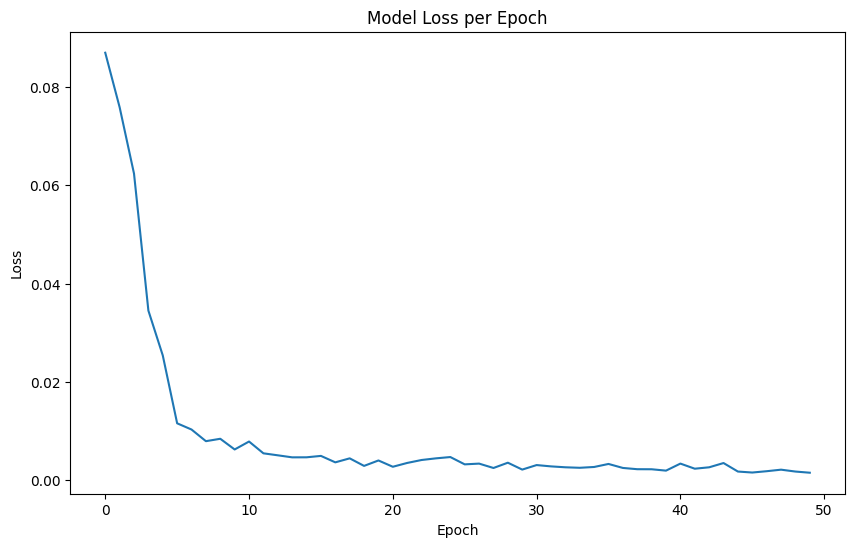

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


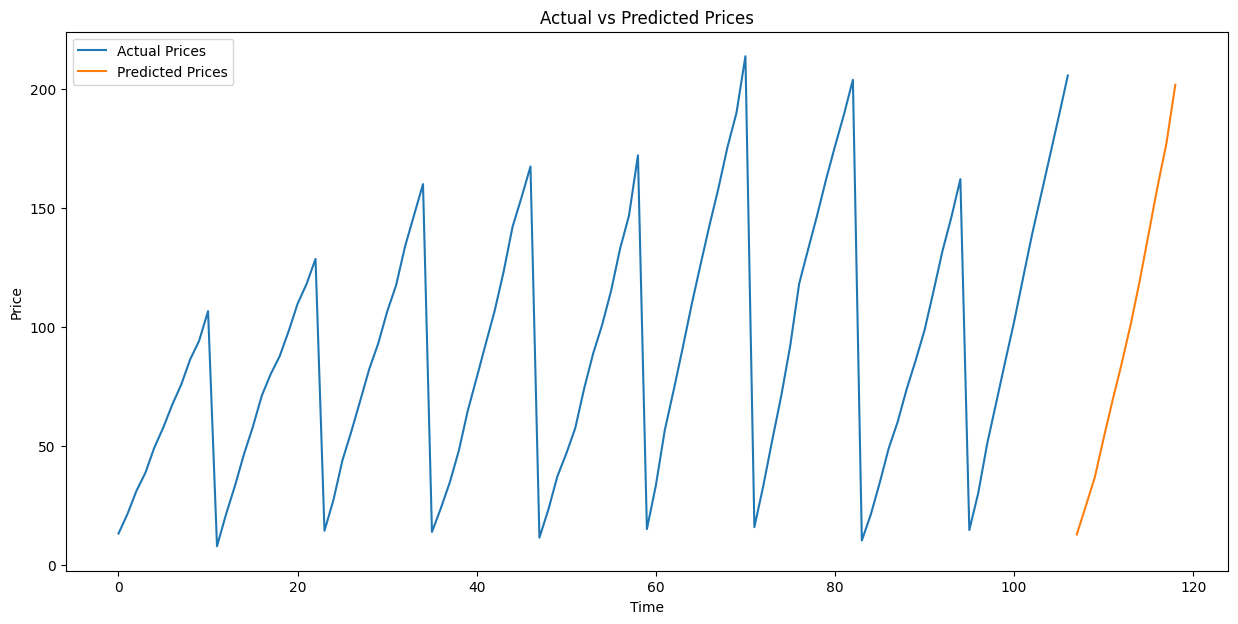

Predicted values for the next 12 periods:
[ 12.810145  24.718616  36.677895  53.269276  69.22705   84.406845
 100.70188  118.83065  138.60728  158.5651   176.83647  201.60974 ]


In [ ]:
# prompt: now, using that df, train model to predict next 12 values for price. It must be very accurate. Make plot, that will combine given and predicted values. Train model for 50 epochs and give its loss/epoch plot as well. After making plot - print out that values. P.s. DO NOT use datatime


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
prices = df['price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create the training dataset
def create_dataset(dataset, look_back=1):
  X, Y = [], []
  for i in range(len(dataset) - look_back):
    a = dataset[i:(i + look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

look_back = 12
X_train, y_train = create_dataset(scaled_prices, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Prepare data for prediction
# We need the last 'look_back' values from the training data to predict the next values
last_sequence = scaled_prices[-look_back:].reshape(1, look_back, 1)

# Predict the next 12 values
predicted_scaled_prices = []
current_sequence = last_sequence

for _ in range(12):
  predicted_price = model.predict(current_sequence)
  predicted_scaled_prices.append(predicted_price[0, 0])
  # Update the sequence: remove the first value and add the predicted value
  current_sequence = np.roll(current_sequence, -1, axis=1)
  current_sequence[0, -1, 0] = predicted_price[0, 0]

# Inverse transform the predictions
predicted_prices = scaler.inverse_transform(np.array(predicted_scaled_prices).reshape(-1, 1))

# Combine actual and predicted values for plotting
actual_prices = df['price'].values
combined_prices = np.concatenate((actual_prices, predicted_prices.flatten()))

# Plot the combined values
plt.figure(figsize=(15, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(np.arange(len(actual_prices), len(actual_prices) + 12), predicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the predicted values
print("Predicted values for the next 12 periods:")
print(predicted_prices.flatten())
